## EGA SULFIKA_2009106011

## Import Library

In [2]:
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,optimizers,datasets
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds

# Load dataset

In [3]:
datakb,info = tfds.load('horses_or_humans', split='train+test', shuffle_files=True, with_info=True, as_supervised=True)

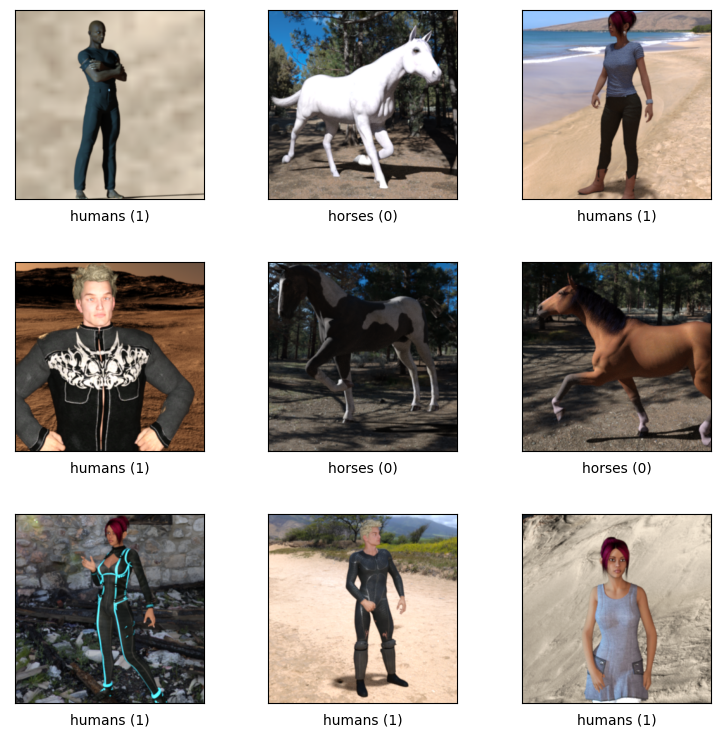

In [4]:
visualisasi = tfds.visualization.show_examples(datakb,info)

In [5]:
def resize(image,label):
  image = tf.image.resize(image,[224,224])
  return (image,label)
datakb = datakb.map(resize)
datakb = datakb.map(lambda x,y: (x / 255,y))
datakb = datakb.shuffle(len(datakb))
datakb = datakb.batch(32)

In [10]:
def one_hot(image, label):
    label = tf.one_hot(tf.cast(label, tf.int32), 3)
    label = tf.cast(label, tf.float32)
    return image, label

datakb = datakb.map(one_hot)

## Model Sequential

In [9]:
model = tf.keras.models.Sequential(layers = [
                                     tf.keras.layers.Conv2D(32,(5,5),activation='relu',input_shape=(224,224,3)),
                                     tf.keras.layers.MaxPool2D(),
                                     tf.keras.layers.Conv2D(16,(3,3),activation='relu'),
                                     tf.keras.layers.MaxPool2D((4,4)),
                                     tf.keras.layers.Flatten(),
                                     tf.keras.layers.BatchNormalization(),
                                     tf.keras.layers.Dense(256,activation='relu'),
                                     tf.keras.layers.Dense(3,activation='softmax')
],
name='ConvModel')

model.compile(
    'adam',
    'categorical_crossentropy',
    ['accuracy']
)

Epoch 1/5
41/41 [==============================] - 120s 3s/step - loss: 0.4330 - accuracy: 0.8956
Epoch 2/5
41/41 [==============================] - 112s 3s/step - loss: 0.6460 - accuracy: 0.9166
Epoch 3/5
41/41 [==============================] - 117s 3s/step - loss: 0.2565 - accuracy: 0.9517
Epoch 4/5
41/41 [==============================] - 113s 3s/step - loss: 0.1191 - accuracy: 0.9766
Epoch 5/5
41/41 [==============================] - 111s 3s/step - loss: 0.0516 - accuracy: 0.9891


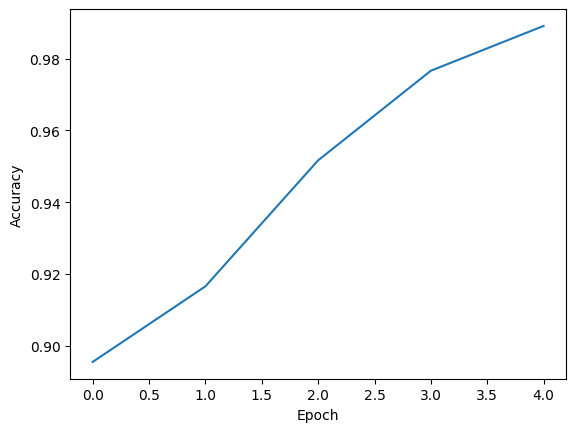

In [8]:
Cek = model.fit(datakb,epochs=5)

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
alpha = plt.plot(Cek.history['accuracy'])